
# Ejercicio k-Nearest Neighbor (kNN)



Empezamos importando las librerías de Python necesarias para este ejemplo

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generación de las muestras de ejemplo

Ahora vamos a generar 100 puntos alearios con distrubuciones:
- _100_ puntos siguiendo la distribución 1: Distribución Gaussiana de media _(0,0)_ y varianza _1_
- _100_ puntos siguiendo la distribución 2: Distribución Gaussiana de media _(1,1)_ y varianza _0.5_

Luego concatenamos estos dos vectores, obteniendo `x_train`, de dimensión _200_

`y_train` son las etiquetas. Tiene un "1" en la posición "i" si el elemento _i-ésimo_ fue muestreado con la distrubución 1 (tiene un 2 si fue muestreado con la distribución 2).

Creamos aleatoriamente un punto para testear: `x_test`. El objetivo de todo este problema es estimar `y_test`, la etiqueta que le asignaremos a `x_test`

Por último vamos a plotear los puntos que creamos

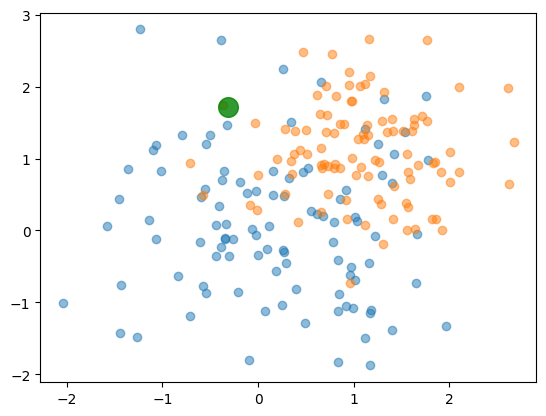

In [4]:
n_points = 100

x_train1 = np.random.multivariate_normal([0, 0], [[1, 0],[0, 1]], n_points)
x_train2 = np.random.multivariate_normal([1, 1], [[0.5, 0], [0, 0.5]], n_points)
x_train = np.vstack((x_train1, x_train2))

y_train = np.hstack((np.ones(n_points, dtype=int), 2 * np.ones(n_points, dtype=int)))

x_test = np.random.multivariate_normal([0, 0], [[1, 0],[0, 1]], 1)

plt.figure()
plt.scatter(x_train1[:, 0], x_train1[:, 1], alpha=0.5)
plt.scatter(x_train2[:, 0], x_train2[:, 1], alpha=0.5)
plt.scatter(x_test[0, 0], x_test[0, 1], color='green', s=200, alpha=0.8)
plt.show()

In [8]:
y_train.shape

(200,)

## Implementación de k-NN

- Definimos _K_
- Calculamos las distancias
- Ordenamos según las distancias de menor a mayor y nos quedamos con los primeros _K_
- Calculamos la clase predicha por mayoría

In [12]:
K = 5

# Rellenar aqui
# ------------------------------------------------------------------------------
# Debemos calcular "d", que debe representar la distancia euclídea entre el 
# punto del espacio x_test y cada uno de los puntos x_train. 
# En la posición i del vector d, debe estar la distancia entre x_test y el 
# i-esimo elemento de x_train
# 
d = (x_train[:, 0] - x_test[0, 0]) ** 2 + (x_train[:, 1] - x_test[0, 1]) ** 2
# 
# ==============================================================================

# Obtenemos los índices de las distacias ordenados de menor a mayor, y nos 
# quedamos con los K primeros
idxs = np.argsort(d)[:K]
print(idxs)
print(d[idxs])
print(y_train[idxs])

# Rellenar aqui
# ------------------------------------------------------------------------------
# Calcular y_test, la etiqueta del punto de test (x_test). De los K puntos más
# cercanos debemos fijarnos la etiqueta, y elegir por mayoría
# 
y_test = np.median(y_train[idxs])
# 
# ==============================================================================

# Mensaje de salida
print("La clase asignada a la nueva muestra es: {0}".format(y_test))

[196  91 172  45  92]
[0.00330836 0.06401995 0.13408591 0.18285517 0.31795881]
[2 1 2 1 1]
La clase asignada a la nueva muestra es: 1.0


## Visualización
Aquí pintamos la muestra de test del color correspondiente

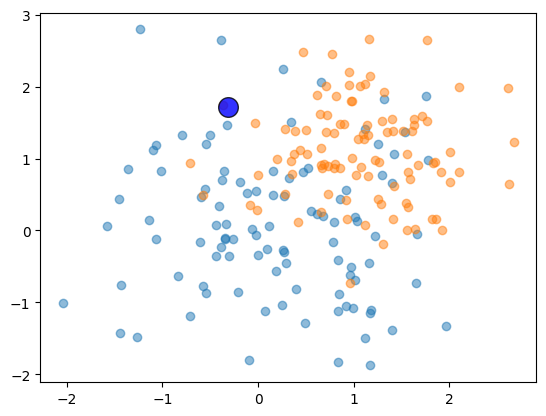

In [13]:
# Visualización
colors = ['', 'blue', 'orange']

plt.figure()
plt.scatter(x_train1[:, 0], x_train1[:, 1], alpha=0.5)
plt.scatter(x_train2[:, 0], x_train2[:, 1], alpha=0.5)
plt.scatter(x_test[0, 0], x_test[0, 1], color=colors[np.int64(y_test)], s=200, alpha=0.8, edgecolor='k')

## FIN!